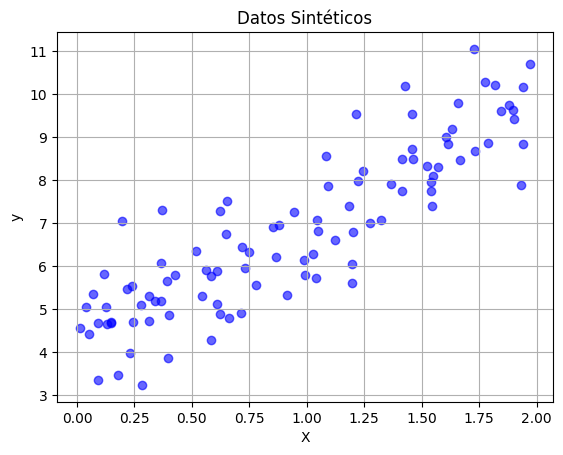

📌 Parámetros óptimos (θ):
Intercepto: 4.2151
Pendiente:  2.7701


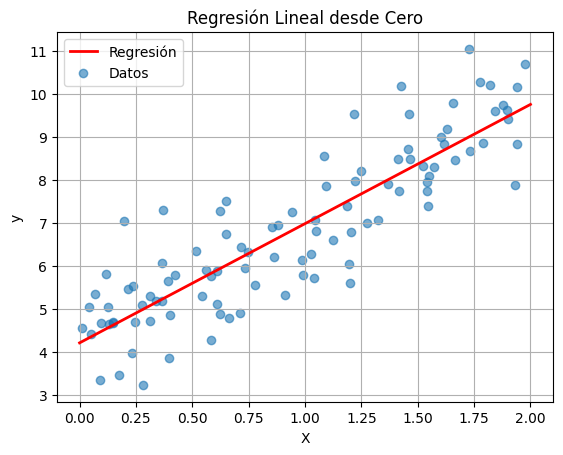

📉 MSE: 0.8066
📈 R²:  0.7693


In [ ]:
# Note 05/24/2025 22:55:25
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Paso 1: Generar datos sintéticos
# ----------------------------

np.random.seed(42)

# Variables independientes (X) y dependientes (y)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + ruido

# Visualizar los datos
plt.scatter(X, y, color="blue", alpha=0.6)
plt.title("Datos Sintéticos")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

# ----------------------------
# Paso 2: Preparar matrices
# ----------------------------

# Agregar columna de 1s para el término de sesgo (intercepto)
X_b = np.c_[np.ones((100, 1)), X]  # [1, x]

# ----------------------------
# Paso 3: Ecuación Normal
# ----------------------------

# θ = (XᵗX)⁻¹ Xᵗy
theta_opt = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("📌 Parámetros óptimos (θ):")
print(f"Intercepto: {theta_opt[0][0]:.4f}")
print(f"Pendiente:  {theta_opt[1][0]:.4f}")

# ----------------------------
# Paso 4: Predicción
# ----------------------------

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_pred = X_new_b.dot(theta_opt)

# Visualizar la línea de regresión
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Regresión")
plt.scatter(X, y, alpha=0.6, label="Datos")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresión Lineal desde Cero")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Paso 5: Evaluación del Modelo
# ----------------------------

# Predicciones sobre los datos originales
y_hat = X_b.dot(theta_opt)

# Error cuadrático medio (MSE)
mse = np.mean((y_hat - y) ** 2)

# Coeficiente de determinación (R²)
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_res = np.sum((y - y_hat) ** 2)
r2 = 1 - (ss_res / ss_total)

print(f"📉 MSE: {mse:.4f}")
print(f"📈 R²:  {r2:.4f}")
